<a href="https://colab.research.google.com/github/GustavoEmanuel901/Aulas-ML/blob/main/Aula2ML_Cancer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import StandardScaler
import pandas as pd

# Carregar o conjunto de dados Breast Cancer
data = load_breast_cancer()
X = data.data
y = data.target

# Criar um DataFrame para visualizar melhor
df = pd.DataFrame(X, columns=data.feature_names)

# Normalização

In [ ]:

# Exibir as primeiras linhas antes da normalização
print("Antes da normalização:")
print(df.head())

# Normalizar os dados
scaler = StandardScaler()
X_normalized = scaler.fit_transform(X)

# Criar um DataFrame com os dados normalizados
df_normalized = pd.DataFrame(X_normalized, columns=data.feature_names)

# Exibir as primeiras linhas depois da normalização
print("\nDepois da normalização:")
print(df_normalized.head())

Antes da normalização:
   mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0        17.99         10.38          122.80     1001.0          0.11840   
1        20.57         17.77          132.90     1326.0          0.08474   
2        19.69         21.25          130.00     1203.0          0.10960   
3        11.42         20.38           77.58      386.1          0.14250   
4        20.29         14.34          135.10     1297.0          0.10030   

   mean compactness  mean concavity  mean concave points  mean symmetry  \
0           0.27760          0.3001              0.14710         0.2419   
1           0.07864          0.0869              0.07017         0.1812   
2           0.15990          0.1974              0.12790         0.2069   
3           0.28390          0.2414              0.10520         0.2597   
4           0.13280          0.1980              0.10430         0.1809   

   mean fractal dimension  ...  worst radius  worst texture  worst pe

# WRAPPER

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Criar o modelo base (Random Forest, neste caso)
model = RandomForestClassifier()

# Criar o método de seleção de características (Sequential Feature Selector - SFS)
# Aqui usamos "forward" para adicionar características progressivamente
sfs = SequentialFeatureSelector(model, n_features_to_select=5, direction='forward')

# Ajustar o SFS aos dados de treinamento
sfs.fit(X_train, y_train)

# Ver quais características foram selecionadas
selected_features = sfs.get_support(indices=True)
print("Características selecionadas:", data.feature_names[selected_features])



Características selecionadas: ['mean fractal dimension' 'symmetry error' 'worst texture'
 'worst perimeter' 'worst smoothness']


# FILTRO

In [ ]:
from sklearn.feature_selection import mutual_info_classif

# Calcular a informação mútua
mi = mutual_info_classif(X, y)

# Criar um DataFrame para visualizar os resultados
mi_df = pd.DataFrame({'Feature': data.feature_names, 'Mutual Information': mi})
mi_df = mi_df.sort_values(by='Mutual Information', ascending=False)
print("Informação mútua entre características e o alvo:")
print(mi_df)

Informação mútua entre características e o alvo:
                    Feature  Mutual Information
22          worst perimeter            0.473178
23               worst area            0.463900
20             worst radius            0.455244
7       mean concave points            0.442552
27     worst concave points            0.437129
2            mean perimeter            0.403666
6            mean concavity            0.374857
0               mean radius            0.367296
3                 mean area            0.358754
13               area error            0.340696
26          worst concavity            0.314138
12          perimeter error            0.274670
10             radius error            0.251660
25        worst compactness            0.226706
5          mean compactness            0.206869
17     concave points error            0.128673
21            worst texture            0.123530
16          concavity error            0.115259
24         worst smoothness            

# FILTRO - chi2


In [ ]:
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_normalized = scaler.fit_transform(X)

# Aplicar a seleção de atributos usando chi2
k = 10  # Número de melhores características a serem selecionadas
selector = SelectKBest(score_func=chi2, k=k)
X_new = selector.fit_transform(X_normalized, y)

# Obter as características selecionadas
selected_features = selector.get_support(indices=True)
feature_names = data.feature_names[selected_features]

print(f"Características selecionadas (top {k}):")
print(feature_names)

# Exibir os scores chi2 das características
scores = selector.scores_
df_scores = pd.DataFrame({'Feature': data.feature_names, 'Score': scores})
df_scores = df_scores.sort_values(by='Score', ascending=False)
print("\nScores chi2 das características:")
print(df_scores)

Características selecionadas (top 10):
['mean radius' 'mean perimeter' 'mean area' 'mean concavity'
 'mean concave points' 'worst radius' 'worst perimeter' 'worst area'
 'worst concavity' 'worst concave points']

Scores chi2 das características:
                    Feature      Score
7       mean concave points  52.405743
27     worst concave points  46.341648
6            mean concavity  46.186395
23               worst area  35.043882
22          worst perimeter  34.438091
20             worst radius  34.124937
26          worst concavity  31.563031
3                 mean area  29.328594
2            mean perimeter  26.528902
0               mean radius  24.897293
25        worst compactness  20.992541
5          mean compactness  20.353176
13               area error  19.676975
10             radius error  17.324128
12          perimeter error  16.044344
21            worst texture   8.741628
1              mean texture   6.394071
17     concave points error   5.781996
24         wo

# PCA


Primeiras linhas após PCA:
        PC1        PC2  target
0  9.192837   1.948583       0
1  2.387802  -3.768172       0
2  5.733896  -1.075174       0
3  7.122953  10.275589       0
4  3.935302  -1.948072       0


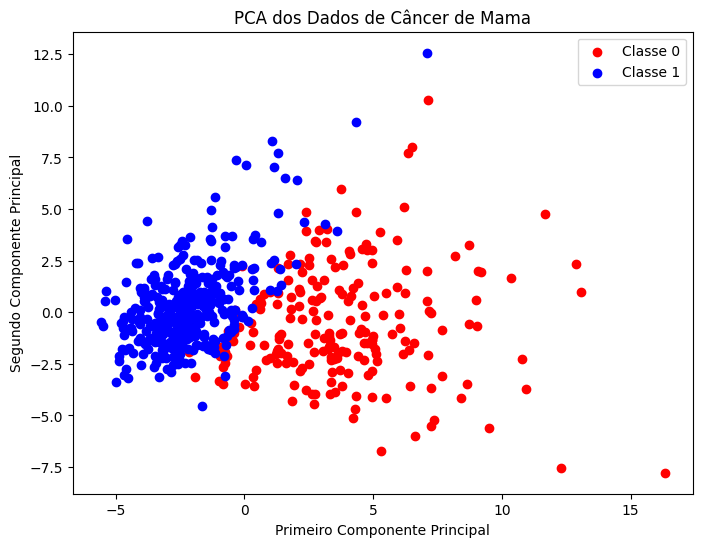

In [ ]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Normalizar os dados
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

pca = PCA(n_components=2)  # Reduzir para 2 dimensões para visualização
X_pca = pca.fit_transform(X_scaled)

# Criar um DataFrame para visualização
df_pca = pd.DataFrame(X_pca, columns=['PC1', 'PC2'])
df_pca['target'] = y

# Visualizar os primeiros pontos
print("Primeiras linhas após PCA:")
print(df_pca.head())

# Plotar os componentes principais
plt.figure(figsize=(8, 6))
plt.scatter(df_pca[df_pca['target'] == 0]['PC1'], df_pca[df_pca['target'] == 0]['PC2'], color='red', label='Classe 0')
plt.scatter(df_pca[df_pca['target'] == 1]['PC1'], df_pca[df_pca['target'] == 1]['PC2'], color='blue', label='Classe 1')
plt.xlabel('Primeiro Componente Principal')
plt.ylabel('Segundo Componente Principal')
plt.title('PCA dos Dados de Câncer de Mama')
plt.legend()
plt.show()

# Random projection

Primeiras linhas após Random Projection:
   Component 1  Component 2  target
0     1.447010     9.820978       0
1    -2.302216    -4.051365       0
2    -2.777287     1.132098       0
3     0.144735    14.447460       0
4     2.354659     0.582896       0


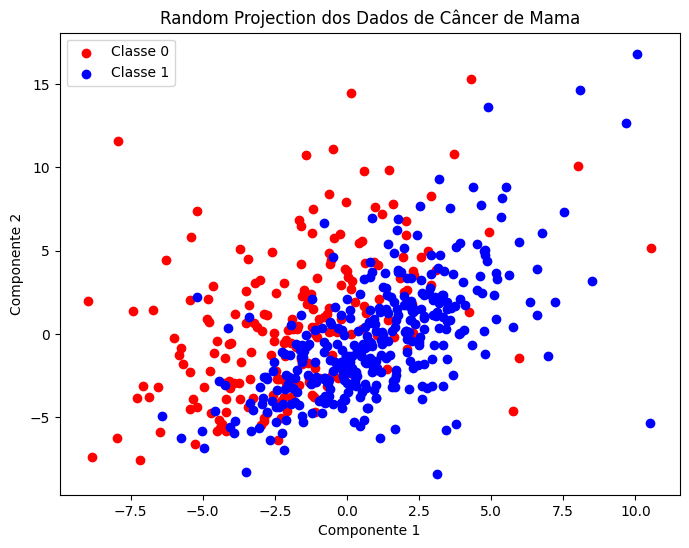

In [ ]:
import matplotlib.pyplot as plt
from sklearn.random_projection import GaussianRandomProjection

# Normalizar os dados
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Aplicar Random Projection
n_components = 2  # Dimensão do espaço projetado
rp = GaussianRandomProjection(n_components=n_components)
X_rp = rp.fit_transform(X_scaled)

# Criar um DataFrame para visualização
df_rp = pd.DataFrame(X_rp, columns=['Component 1', 'Component 2'])
df_rp['target'] = y

# Visualizar os primeiros pontos
print("Primeiras linhas após Random Projection:")
print(df_rp.head())

# Plotar os componentes projetados
plt.figure(figsize=(8, 6))
plt.scatter(df_rp[df_rp['target'] == 0]['Component 1'], df_rp[df_rp['target'] == 0]['Component 2'], color='red', label='Classe 0')
plt.scatter(df_rp[df_rp['target'] == 1]['Component 1'], df_rp[df_rp['target'] == 1]['Component 2'], color='blue', label='Classe 1')
plt.xlabel('Componente 1')
plt.ylabel('Componente 2')
plt.title('Random Projection dos Dados de Câncer de Mama')
plt.legend()
plt.show()